In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../data/MNISTonly0_1.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Seeing the images

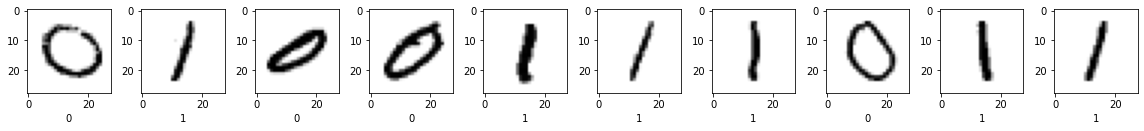

In [8]:
fig, ax = plt.subplots(figsize=(16,6),nrows=1,ncols=10)
for i in range(10):
    img = X.loc[i].values.reshape(28,28)
    ax[i].imshow(img,cmap='binary')
    ax[i].set_xlabel(y[i])
plt.tight_layout()
plt.show()    

# Splitting and standardizing the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Applying PCA

In [14]:
pca = PCA(n_components= .90)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Classification report for train set')
print(classification_report(y_true=y_train, y_pred=train_pred))

print('Classification report for test set')
print(classification_report(y_true=y_test, y_pred=test_pred))

print(f'The accuracy of train set is {clf.score(X_train, y_train)}')
print(f'The accuracy of test set is {clf.score(X_test, y_test)}')

Classification report for train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1622
           1       1.00      1.00      1.00      1578

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200

Classification report for test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       422

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

The accuracy of train set is 1.0
The accuracy of test set is 0.99875


In [13]:
print(f'Number of features before PCA {X.shape[1]}')
print(f'Number of features after PCA {X_train.shape[1]}')
print(f'The number of components in the PCA is {str(pca.n_components_)}') #another way of representing 

Number of features before PCA 784
Number of features after PCA 105
The number of components in the PCA is 105
